# Optimal portfolios: Constructing the Efficient Frontier

Optimization methods form a methodological base for portfolio theory, one of these important methods is the efficient frontier which became important in the modern portfolio theory, it has been the basis for the modern portfolio theory because it’s describing one of the most important areas in finance and investment analysis which is the relationship between the expected rate of return and the risk of asset. In this paper, we will examine this relationship and see how that can help the investors to make better investment decisions.

Building an efficient frontier for more than two stocks, (in our case we have five stocks) consists of following steps:
1.	Select stocks and download the historical values of the prices of each of the stocks over a period of time
2.	Using the price data to determine the return on the selected stocks.
3.	Gathering the average return data for the selected stocks in so called the mean vector.
4.	Build a weighted covariance matrix and an inverse matrix.
5.	Find the portfolio weight set with the lowest standard deviation.
6.	Construct the portfolio with the highest sharp ratio.
7.	Graphing the efficient frontier.


# Step 1

In the first step we will select the stocks and download the historical values of the prices of each of the stocks over a period of time. The stocks that we have selected are following: 
•	Bank of America (BAC)


•	eBay (EBAY)


•	Netflix (NFLX)


•	Nike (NKE) 


•	American international group (AIG)


After selecting our stocks from the capital market, we download the historical values of the prices from yahoo finance over a period of time that covers ten years, from 1st December 2008 - 1st December 2018, we choose the frequency “weekly” because we are interested in determining the weekly returns not the daily returns.



In [2]:
import numpy as np
import numpy.random as npr
import math
import pandas as pd
import csv

In [2]:
data = pd.read_csv('Prices.csv') 
data.head()

,Bank of America,eBay,Netflix,Nike,American International Group
0,13.704663,5.875421,3.610000,9.009115,29.484703
1,13.731681,6.005892,4.072857,8.502055,27.356949
2,12.692377,6.081650,3.955714,8.827532,24.317286
3,12.287694,5.723906,4.065714,8.569217,23.861338
4,13.179837,6.170033,4.267143,9.137513,25.685127


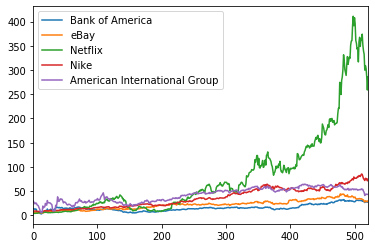

In [4]:
#plot the data
data.plot()

# Step 2

In the next step we will use the data of prices to determine the returns of the selected stocks
In our case, we are interested in finding the weekly returns, to determine the weekly returns for each of the selected stocks, we take the (ln) of the division for the second day of the historical price on the first day, or by using the method for calculating the stock return:

$ r=\frac{p(1)-p(0)}{(p(0)} $

Where p(0) is the initial price of the stock and p(1)  is the final price of the stock.


In [5]:
# function to calculate daily simple returns
def getReturns(org):
    return (org- org.shift(1))/org.shift(1)

In [6]:
# function call
data['BAC-Return'] = getReturns(data['Bank of America'])
data['EBAY-Return'] = getReturns(data['eBay'])
data['NFLX-Return'] = getReturns(data['Netflix'])
data['NKE-Return'] = getReturns(data['Nike'])
data['AIG-Return'] = getReturns(data['American International Group'])

In [7]:
data.dropna(inplace=True)
data.head()

,Bank of America,eBay,Netflix,Nike,American International Group,BAC-Return,EBAY-Return,NFLX-Return,NKE-Return,AIG-Return
1,13.731681,6.005892,4.072857,8.502055,27.356949,0.001971,0.022206,0.128215,-0.056283,-0.072165
2,12.692377,6.081650,3.955714,8.827532,24.317286,-0.075687,0.012614,-0.028762,0.038282,-0.111111
3,12.287694,5.723906,4.065714,8.569217,23.861338,-0.031884,-0.058824,0.027808,-0.029262,-0.018750
4,13.179837,6.170033,4.267143,9.137513,25.685127,0.072605,0.077941,0.049543,0.066318,0.076433
5,11.947389,5.972222,4.608572,8.543384,24.621256,-0.093510,-0.032060,0.080013,-0.065021,-0.041420


# Step 3

Gathering the average return data for the selected stocks in so called the mean vector.
After determining the weekly returns for each of the selected stocks, we can now compute the mean return or the average of each of the five selected stocks and putting them in a vector called the mean vector $(μ)$
The expected return of the assets is defined as following:

# The expected return of the assets is defined as following:

$μ_i=E(r_i)= ∑_{t=1}^{T}\frac{r_t}{T}$


where $r_t$ is the return in period t.

In [8]:
# calculation of mean
p_BAC=np.mean(data['BAC-Return'])
p_EBAY=np.mean(data['EBAY-Return'])
p_NFLX=np.mean(data['NFLX-Return'])
p_NKE=np.mean(data['NKE-Return'])
p_AIG=np.mean(data['AIG-Return'])

In [9]:
# Mean return of Portfolio
p = np.array([p_BAC, p_EBAY, p_NFLX, p_NKE, p_AIG])
p

array([0.00377071, 0.00399644, 0.01129905, 0.0046245 , 0.0050397 ])

After calculating the mean return, it’s important now to determine the sample variance and the standard deviation for each of the five stocks.


# The sample variance is described by this formula:

$σ^2=\frac{1}{T} ∑_{t=1}^{T}(r_t-\bar{r})^{2}$


In [10]:
#calculation of variance
import statistics
var_bac=statistics.pvariance(data['BAC-Return'])
var_ebay=statistics.pvariance(data['EBAY-Return'])
var_nflx=statistics.pvariance(data['NFLX-Return'])
var_nke=statistics.pvariance(data['NKE-Return'])
var_aig=statistics.pvariance(data['AIG-Return'])

In [11]:
v = np.array([var_bac, var_ebay, var_nflx, var_nke, var_aig])
v

array([0.00519203, 0.00177501, 0.00608528, 0.00110969, 0.01168378])

# The standard deviation is just the square root of the variance.

$σ=\sqrt{\frac{1}{T} ∑_{t=1}^{T}(r_t-\bar{r} )^{2}}$

The results are as following:

In [12]:
stand_bac=statistics.pstdev(data['BAC-Return'])
stand_ebay=statistics.pstdev(data['EBAY-Return'])
stand_nflx=statistics.pstdev(data['NFLX-Return'])
stand_nke=statistics.pstdev(data['NKE-Return'])
stand_aig=statistics.pstdev(data['AIG-Return'])

In [13]:
s = np.array([stand_bac, stand_ebay, stand_nflx, stand_nke, stand_aig])
s

array([0.07205572, 0.04213087, 0.07800818, 0.03331202, 0.10809153])

Now we can put the expected returns of the assets for the five stocks into a vector called the mean vector and create another vector which is the ones vector which consists of only ones, that will be used for computing the weights of the portfolio.

$$\mathbb u =\begin{bmatrix}   0.00377\\
0.00400\\
0.01130\\ 
0.00462\\ 
0.00504\end{bmatrix}$$

$$\mathbb 1 =\begin{bmatrix}   1\\
1\\
1\\ 
1\\ 
1\end{bmatrix}$$

# Step 4

The next step is to build a weighted covariance matrix and an inverse matrix. 
Once we are done with calculating the mean return, the simple variance and the standard deviation of each of these stocks, we can now build our covariance matrix. Variance-covariance matrix is a matrix which includes the variances and covariances between the return of a set of assets where entries on the main diagonal are the variances of the assets and those values off the diagonal represent the covariances. For assets A, B, C, D, E i.e. for 5 assets, the variance-covariance matrix would be of the form:


$$variance-covariance-matrix=\begin{bmatrix}\\
ASSETS&BAC&EBAY&NFLX&NKE&AIG\\
BAC&\mathbb \sigma_{A}^{2} &  & &&&\\
EBAY&\sigma_{AB} & \sigma_{B}^{2} & &&&\\
NFLX&\sigma_{AC} & \sigma_{BC} & \sigma_{C}^{2}& &&&\\
NKE&\sigma_{AD} & \sigma_{BD} & \sigma_{CD}& \sigma_{D}^{2}&\\
AIG&\sigma_{AE} & \sigma_{BE} & \sigma_{CE}&  \sigma_{DE}& \sigma_{E}^{2}&\\
\end{bmatrix}$$

$$variance-covariance-matrix=\begin{bmatrix} \\
ASSETS&BAC&EBAY&NFLX&NKE&AIG\\
BAC&0.00519 & 0.00098 & 0.00085&0.00096&0.00323\\
EBAY&0.00098 & 0.00177 & 0.00065&0.00059&0.00098\\
NFLX&0.00085 &  0.00065&0.00608&0.00049&0.00091\\
NKE&0.00096&0.00059&0.00049&0.00111&0.00082\\
AIG&0.00323&0.00098&0.00091&0.00082&0.01168&
\end{bmatrix}$$

In [14]:
s_BAC=data['BAC-Return']
s_EBAY=data['EBAY-Return']
s_NFLX=data['NFLX-Return']
s_NKE=data['NKE-Return']
s_AIG=data['AIG-Return']

In [15]:
# computer portfolio covariance matrix
covariance = np.array([s_BAC, s_EBAY, s_NFLX,s_NKE, s_AIG])

In [16]:
Sigma= np.cov(covariance, bias =True)
print(Sigma)

[[0.00519203 0.00098077 0.00084937 0.00095951 0.00323445]
 [0.00098077 0.00177501 0.00064695 0.00059396 0.00097668]
 [0.00084937 0.00064695 0.00608528 0.00048577 0.00091058]
 [0.00095951 0.00059396 0.00048577 0.00110969 0.00081998]
 [0.00323445 0.00097668 0.00091058 0.00081998 0.01168378]]


where the values on the main diagonal are the variances which are equal to the variances obtained above for each of the stocks and the values below the variances represent the covariances between them.

Now let $H^{-1}$ be the inverse matrix of our covariance matrix, we can see that the inverse covariance matrix is:

$$inverse-matrix=\begin{bmatrix} \\
ASSETS&BAC&EBAY&NFLX&NKE&AIG\\
BAC&270.60 & -62.596 & -10.197&-153.047&-58.143\\
EBAY&-62.596 & 724.31 & -41.379&-301.527&-18.832\\
NFLX&-10.197 &  -41.379&174.16&-42.068&-4.3389\\
NKE&-153.047&-301.527&-42.068&1224.436&-15.0797\\
AIG&-58.143&-18.832&-4.3389&-15.0797&104.655&
\end{bmatrix}$$

In [17]:
#computing the inverse of matrix
from numpy.linalg import inv
inverse = inv(Sigma)
inverse

array([[ 270.60037314,  -62.59608306,  -10.19746342, -153.04763483,
         -58.1426301 ],
       [ -62.59608306,  724.30501847,  -41.37877618, -301.52680714,
         -18.83176954],
       [ -10.19746342,  -41.37877618,  174.1610704 ,  -42.06856402,
          -4.33891988],
       [-153.04763483, -301.52680714,  -42.06856402, 1224.43623172,
         -15.0796689 ],
       [ -58.1426301 ,  -18.83176954,   -4.33891988,  -15.0796689 ,
         104.65518992]])

# Step 5

In this step we will find the portfolio weight set with the lowest standard deviation.
Once we have the variance-covariance matrix and the inverse matrix, we can now find the portfolio weight set with the lowest standard deviation. 
First, we need to assume that the weights are equal, so that we need to assign the equal weight to each of the five selected assets, in addition we know that the sum of these weights should equal to 1, so we need to make a constraint which stipulate that the weights assigned to the assets can’t exceeds 1, so that:


$∑_{i=1}^{5}w_i=1$ 

$w_{BAB}=w_{EBAY}=w_{NFLX}=w_{NKE}=w_{AIG}=0.2$ and the sum is equal to 1

# Portfolio weights

In [18]:
#the sum of weights is equal to 1
n = 5
weights = np.array([1/n, 1/n, 1/n, 1/n, 1/n])
weights

array([0.2, 0.2, 0.2, 0.2, 0.2])

In [19]:
p

array([0.00377071, 0.00399644, 0.01129905, 0.0046245 , 0.0050397 ])

In [20]:
reshape_return = p.reshape(5,1)
reshape_return

array([[0.00377071],
       [0.00399644],
       [0.01129905],
       [0.0046245 ],
       [0.0050397 ]])

We will use the function numpy.matmul to multiply two matrices.

# Portfolio Expected Return:

$E(r_{p} )=E\left(∑_{i=1}^{N}w_{i} r_{i }\right)$

$= ∑_{i=1}^{N}E(w_{i} r_{i} )= ∑_{i=1}^{N}w_{i} E(r_{i)}$

$r_{p}= \mathbb μ{^T} \mathbb w= \mathbb w^{T}  \mathbb μ$


here we have $\mathbb w^{T}$ as weights and $\mathbb μ$ as $p$

In [21]:
#portfolio expected return in %
r_p = np.matmul(weights,reshape_return)*100
r_p

array([0.57460781])

The expected return of the portfolio is 0.57%

In [22]:
w = weights.reshape(5,1)
w

array([[0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.2]])

# Portfolio Variance:

$Var(r_{p})= Var(∑_{i=}^{N}w_{i} r_{i})$


$= ∑_{i=1}^{N}∑_{j=1}^{N}Cov (w_{i} r_{i},w_{j} r_{j} )$


$= ∑_{i=1}^{N}∑_{j=1}^{N}w_{i}  w_{j} \sigma_{i,j } $


$\sigma_p^{2}= \mathbb w^{T} H \mathbb  w$


we have weights as $\mathbb w^{T}$, $\mathbb w$ as $w$ and Sigma as $H$.

In [23]:
var=np.matmul(weights,Sigma)
var

array([0.00224323, 0.00099467, 0.00179559, 0.00079378, 0.0035251 ])

In [24]:
variance = np.matmul(var,w)
variance

array([0.00187047])

# Portfolio standard deviation 

$SD_{p}= \sigma_{p}= \sqrt{\mathbb w^{T} H \mathbb w }$


In [25]:
stdev =math.sqrt(variance)
stdev

0.043248975508847105

# Sharpe Ratio

In [26]:
sharp_ratio = (r_p/stdev)
sharp_ratio

array([13.28604437])

The sharp ratio is 0.13286 or 13.286%.

Now, we will find the weights of the minimum variance portfolio by minimizing the standard deviation so that we obtain the weights for the five assets which gives the lowest standard deviation. The lowest satndard deviation means the lowest risk for the portfolio. The values for portfolio return, portfolio variance and portfolio standard deviation will automatically change after that, the result is illustrated in the following table:

# Weight of minimum variance portfolio

The weights of the minimum variance portfolio $\mathbb w_{min}$ are given by: 

$\mathbb w_{min}^{T}=\frac{\mathbb1^T H^{-1}}{\mathbb1^{T} H^{-1}\mathbb1 }$

where $H$ is the variance-covariance matrix and $H^{-1}$ is the inverse matrix,

$\mathbb1$ is a vector consists of only ones and $\mathbb1^{T}$ is the transpose of this vector.

Before the optimization of the variance portfolio, we need to calculate the portfolio return, variance and standard deviation for the assigned equally weights.


In [27]:
# the weights of the minimum variance portfolio
one = np.ones(n)
one

array([1., 1., 1., 1., 1.])

In [28]:
one_col=one.reshape(5,1)
one_col

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [29]:
w_1 = np.matmul(inverse,one_col)
w_1

array([[-13.38343826],
       [299.97158256],
       [ 76.1773469 ],
       [712.71355683],
       [  8.2622015 ]])

In [30]:
w_2 =np.matmul(one,w_1)
w_2

array([1083.74124953])

In [31]:
weights_min_var = (w_1/w_2)*100
weights_min_var

array([[-1.2349293 ],
       [27.67926225],
       [ 7.02910837],
       [65.76418099],
       [ 0.76237769]])

We can see above that we have obtained negative weights for the first stock (BAC) because we allowed short selling. Permitting short sales removes the non-negativity on the weights of the assets and since there was no constraint about that we obtained negative values in weights, the only constraint we made was that the sum of the weights should not exceeds 1.

# Expected Return of minimum variance portfolio

$E(r_{MVP}) =\frac{\mathbb1 H^{-1}}{\mathbb1 H^{-1}\mathbb1 }$

In [32]:
#portfolio expected return in %
w_m_v=weights_min_var.reshape(1,5)
r_m_v_p = np.matmul(w_m_v,reshape_return)
r_m_v_p

array([[0.4933527]])

The expected return of minimum variance portfolio is 0.49%

# The minimum variance calculation

$\sigma_p^{2}= \frac{\mathbb1}{\mathbb1 H^{-1}\mathbb1 }$

In [33]:
v_1 = np.matmul(inverse,one_col)
v_1


array([[-13.38343826],
       [299.97158256],
       [ 76.1773469 ],
       [712.71355683],
       [  8.2622015 ]])

In [34]:
v_2 = np.matmul(one,v_1)
v_2

array([1083.74124953])

In [35]:
var_m_v_p =one_col/v_2
var_m_v_p

array([[0.00092273],
       [0.00092273],
       [0.00092273],
       [0.00092273],
       [0.00092273]])

The variance is 0.00092.

# The standard deviation of minimum variance portfolio

In [36]:
stdev_m_v_p =math.sqrt(0.00092273)
stdev_m_v_p

0.030376471157789214

The variance is 0.03038.

# Sharp Ratio of minimum variance portfolio

In [37]:
sharp_ratio_m_v_p = (r_m_v_p/stdev_m_v_p)
sharp_ratio_m_v_p

array([[16.24127747]])

The sharp ration is 16.24%.




Our next step is to compute the weights of the maximum drift portfolio or the weights of the maximum sharp ratio $ \mathbb w_{max}$, which is defined as 


# Weights of the maximum drift portfolio

$\mathbb w_{max}^{T}={\frac {\mathbb μ^{T} H^{-1}}{\mathbb μ^{T} H^{-1} \mathbb 1}}$

In [38]:
w_max_1 = np.matmul(p,inverse)
w_max_1

array([-0.34581817,  0.7017487 ,  1.54762212,  3.32894379,  0.11417024])

In [39]:
w_max_2 = np.matmul(w_max_1, one_col)

In [40]:
weights_max =(w_max_1/w_max_2)*100
weights_max

array([-6.46792091, 13.12497572, 28.94555086, 62.26204079,  2.13535354])

The weights are given in % and negative sign means that the short-selling is allowed.

$\mathbb w_{max}^{T}=\sqrt{\frac {\mathbbμ^{T} H^{-1}}{\mathbb μ^{T} H^{-1} \mathbb 1}}$

to do that we need to calculate the sharp ratio or the slope and then we will obtain the weights of the maximum drift portfolio by maximizing the sharp ratio.



# Expected Return

$E(r_{max}) = \mathbb w^{T} \mathbb u$

$\mathbb w^{T}$ is the weights transpose but we don't need to find transpose since our weights are already a row vector and  $\mathbb u$ is expected return which is a column vector.

In [41]:
r_max = np.matmul(weights_max,reshape_return)
r_max

array([0.65381402])

The expected return is 0.65%.

# Varinace

$\sigma_{max}^{2}= \mathbb w^{T} H\mathbb w$

In [42]:
v_max_1 = np.matmul(weights_max,Sigma)
v_max_1

array([0.07052445, 0.0747463 , 0.21132883, 0.08649315, 0.09425871])

In [43]:
w_max =weights_max.reshape(5,1)
w_max

array([[-6.46792091],
       [13.12497572],
       [28.94555086],
       [62.26204079],
       [ 2.13535354]])

In [44]:
variance_max =np.matmul(v_max_1,w_max)
variance_max

array([12.22844182])

The variance is 0.00122.

# Standard Deviaiton

In [45]:
stdev_max =math.sqrt(variance_max)
stdev_max/100

0.03496918903674386

The standard deviation is 0.03497.

# Sharp ratio of maximum drift portfolio

$sharp-ratio= \frac{ μ_{p}}{σ_{p}}$

In [46]:
sharp_ratio_max = r_max/stdev_max
sharp_ratio_max

array([0.1869686])

The sharp ratio is 18.697%.

$$\begin{bmatrix} \\
Mean&weights&weights_{min}&weights_{max}&sharp-ratio&sharp-ratio_{min}&sharp-ratio_{max}\\
0.00377&0.2& -1.2349\% &-6.47\%&13.286\%&16.24\%&18.697\%\\
0.00400&0.2& 27.679\% &13.13\%&&\\
0.01130&0.2&7.029\%&28.95\%&&\\
0.00462&0.2&65.764\%&62.26\%&&\\
0.00504&0.2&0.762378\%&2.14\%&&&
\end{bmatrix}$$

# Step 6
# Construct the portfolio with the highest sharp ratio

Next step is to compute the optimal portfolios using the fact that the portfolios from the minimum variance line satisfy:


$\mathbb w=s \mathbb w_{min}+(1-s) \mathbb w_{max} $         for $s∈[-2,2]$   with step 0.1


The optimal portfolios are portfolios which give the best combinations of return and risk for an investor. It’s also known as maximum sharp portfolio or tangency portfolio which is a portfolio on the efficient frontier at the point where line drown from the point 0 is tangent to the efficient frontier. 
Computing the optimal portfolios for s between the interval [-2, 2] will give the following results


In [38]:
optimal = pd.read_csv('optimal portfolios.csv') 
optimal.head()

,S,1-S,Weights_min,Weights_max,BAC,EBAY,NFLX,NKE,AIG,Return_p,Var_p,Std_p,Sharp_Ratio,Mean_v,Std
0,-2.0,3.0,-1.23%,-6.47%,-0.16950,-0.15970,0.72790,0.5526,0.04900,0.009747,0.003624,0.06020,0.16192,0.003771,0.072056
1,-1.9,2.9,27.68%,13.13%,-0.16426,-0.14515,0.70598,0.5561,0.04762,0.009587,0.003447,0.05871,0.16330,0.003996,0.042131
2,-1.8,2.8,7.03%,28.95%,-0.15902,-0.13060,0.68406,0.5596,0.04624,0.009426,0.003276,0.05723,0.16470,0.011299,0.078008
3,-1.7,2.7,65.76%,62.26%,-0.15378,-0.11605,0.66214,0.5631,0.04486,0.009266,0.003111,0.05577,0.16614,0.004625,0.033312
4,-1.6,2.6,0.76%,2.14%,-0.14854,-0.10150,0.64022,0.5666,0.04348,0.009106,0.002952,0.05433,0.16760,0.005040,0.108092


The BAC, EBAY, NFLX, NKE and AIG is calculated using the following formula:

$\mathbb w=s \mathbb w_{min}+(1-s) \mathbb w_{max} $         

The sharp ratio is $\frac{Return_{p}}{Std_{p}} $

The mean vector is the basically the mean that we have calculated above (p variable) and Std is standard deviation (s variable) that we have calculated in Step 3.

# Step 7

# Graphing the efficient frontier

To plot the efficient frontier in the mean-standard deviation space we need to consider the return and the risk of the portfolio over an interval, in our case we calculated s between the interval $[-2, 2]$, illustrating the standard deviation in the x-axis and the return in the y-axis, we obtain the curve of the efficient frontier.


# Efficient frontier
Efficient frontier represents a set of optimal portfolios which gives the highest return for a defined level of risk, or in other word the lowest risk for a given level of expected return. 
Efficient frontier plays an important role in investment analysis and investment risk management, it represents the lowest risk that can be achieved during a period of time for various level of returns which will help the investors make more accurate investment decision. Also, the efficient frontier consists of an infinite number of portfolios and the portfolio that an investor will chose will depend on his or her tolerance.
All efficient portfolios are of the form:


$\mathbb w=s \mathbb w_{min}+(1-s) \mathbb w_{max} $


Where $\mathbb w_min$  is the market portfolio with the minimal variance and $\mathbb w_{max}$ is the portfolio with the biggest drift, “s” is a constant to be calculated.


Text(0, 0.5, 'Expected Return')

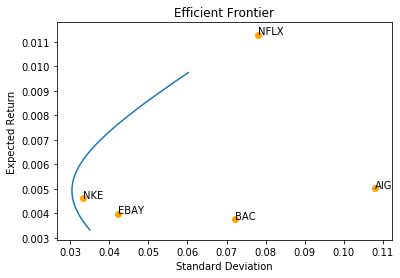

In [35]:
import matplotlib.pyplot as plt
plt.plot(optimal.Std_p,optimal.Return_p)
plt.scatter(optimal.Std,optimal.Mean_v, c='orange')
plt.annotate("BAC",(optimal.Std[0],optimal.Mean_v[0]))
plt.annotate("EBAY",(optimal.Std[1],optimal.Mean_v[1]))
plt.annotate("NFLX",(optimal.Std[2],optimal.Mean_v[2]))
plt.annotate("NKE",(optimal.Std[3],optimal.Mean_v[3]))
plt.annotate("AIG",(optimal.Std[4],optimal.Mean_v[4]))
plt.title('Efficient Frontier')
plt.xlabel('Standard Deviation')
plt.ylabel('Expected Return')

To plot the efficient frontier in the mean-standard deviation space we need to consider the return and the risk of the portfolio over an interval, in our case we calculated s between the interval [-2, 2], illustrating the standard deviation in the x-axis and the return in the y-axis, we obtain the curve of the efficient frontier.
The first figure shows the efficient frontier curve with points which describe each of the stocks where these stocks should be within the efficient frontier curve.


# References 


1) Myles, Gareth D. (2008).  Investment analysis. [Online]. Available at: 
https://people.exeter.ac.uk/gdmyles/Teaching/IAPM/finb1.pdf


2) Radcliffe, Robert C. (2008). Investment: concepts, analysis and strategy. 5th ed.  Library of Congress Cataloging-in-Publication Data.


3) publisher of financial news. (2017). Efficient Frontier, Investing Answers, [Online]. 
Available at: https://investinganswers.com
